# advertising case

Neste projeto foi usado um conjunto de dados ficticios sobre publicidade, indicando se um usuário especifico clicou ou não na propagando, em seguida foi criado um modelo para prever a probabilidade de um usuario clicar na propaganda.

parametros usados no conjunto de dados:

* **tempo_diario_site** : tempo diario no site em minutos.
* **idade** : idade do usuario.
* **renda_media_regiao** : media da renda do usuario na região.
* **tempo_medio_internet** : tempo medio em minutos que o usuario passa na internet.
* **titulo** : titulo da propaganda.
* **cidade** : cidade do usuario.
* **sexo** : 0 para feminino e 1 para masculino.
* **pais** : país do usuario.
* **timestamp_clique** : hora que o usuario clicou no anuncio ou fechou a janela.
* **clique** : 0 não clicou na propaganda e 1 para clicou na propaganda.

In [20]:
#importando as libs

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

In [6]:
df.head()

tempo_diario_site  idade  renda_media_regiao  tempo_medio_internet  \
0              68.95     35            61833.90                256.09   
1              80.23     31            68441.85                193.77   
2              69.47     26            59785.94                236.50   
3              74.15     29            54806.18                245.89   
4              68.37     35            73889.99                225.58   

                                  titulo          cidade  sexo        pais  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

      timestamp_clique  clique  
0  2016-03-27 00:53:11       0  
1  2016-04-04 01:39:02       0  
2  2016-03-13 20:35:42       0  
3  2016-01-10 02:31:19       0  
4  2016-06-03 03:36:18       0

**analisando os dados do df**


In [8]:
df.info()
#podemos observar que não há dados vazios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_diario_site     1000 non-null   float64
 1   idade                 1000 non-null   int64  
 2   renda_media_regiao    1000 non-null   float64
 3   tempo_medio_internet  1000 non-null   float64
 4   titulo                1000 non-null   object 
 5   cidade                1000 non-null   object 
 6   sexo                  1000 non-null   int64  
 7   pais                  1000 non-null   object 
 8   timestamp_clique      1000 non-null   object 
 9   clique                1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
df.describe()

tempo_diario_site        idade  renda_media_regiao  \
count        1000.000000  1000.000000         1000.000000   
mean           65.000200    36.009000        55000.000080   
std            15.853615     8.785562        13414.634022   
min            32.600000    19.000000        13996.500000   
25%            51.360000    29.000000        47031.802500   
50%            68.215000    35.000000        57012.300000   
75%            78.547500    42.000000        65470.635000   
max            91.430000    61.000000        79484.800000   

       tempo_medio_internet         sexo      clique  
count           1000.000000  1000.000000  1000.00000  
mean             180.000100     0.481000     0.50000  
std               43.902339     0.499889     0.50025  
min              104.780000     0.000000     0.00000  
25%              138.830000     0.000000     0.00000  
50%              183.130000     0.000000     0.50000  
75%              218.792500     1.000000     1.00000  
max              269.960000     1.000000     1.00000

**usando pandas profiling para analises mais profundas**


In [10]:
import pandas_profiling as pp
pr = df.profile_report()

In [11]:
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**transformar a feature timestamp**

In [12]:
df['timestamp_clique'] = pd.to_datetime(df['timestamp_clique'])

In [13]:
df.timestamp_clique.dtype

dtype('<M8[ns]')

In [15]:
df['dia'] = df['timestamp_clique'].dt.day
df['mes'] = df['timestamp_clique'].dt.month
df['ano'] = df['timestamp_clique'].dt.year

In [18]:
df.columns

Index(['tempo_diario_site', 'idade', 'renda_media_regiao',
       'tempo_medio_internet', 'titulo', 'cidade', 'sexo', 'pais',
       'timestamp_clique', 'clique', 'dia', 'mes', 'ano'],
      dtype='object')

**fazendo algumas analises pontuais**

<AxesSubplot:>

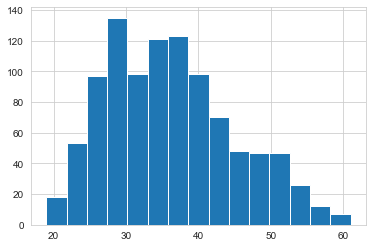

In [26]:
#qual a idade padrao dos usuarios
sns.set_style('whitegrid')
df['idade'].hist(bins=15)


- a maior parte dos usuarios possui idade entre 25 e 45 anos

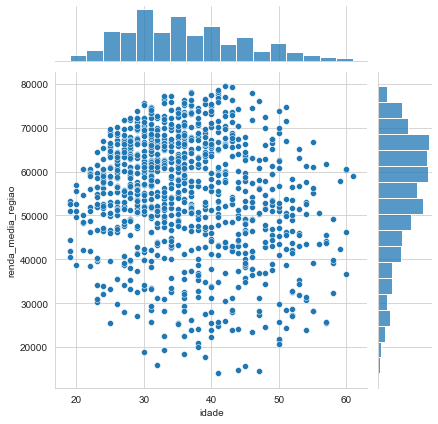

In [32]:
#usuarios mais velhos possuem renda maior que usuarios mais novos?
sns.jointplot(x = 'idade', y = 'renda_media_regiao', data = df);

- a renda não parece ser dependente da idade

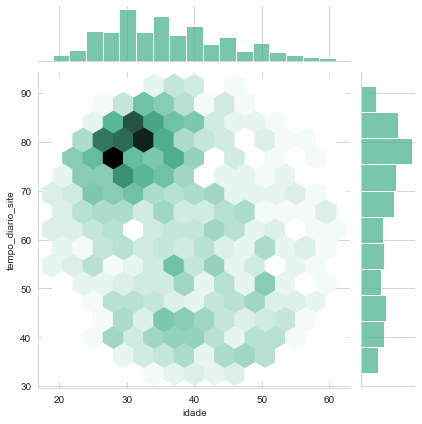

In [48]:
#pessoas mais novas passam mais tempo na site que pessoas velhas?
sns.jointplot( x = 'idade', y = 'tempo_diario_site',kind = 'hex',  data= df, color="#4CB391");

- a concentração usuarios vareia de 20 a 40 anos e costumam passar de 70 a 90 minutos no site

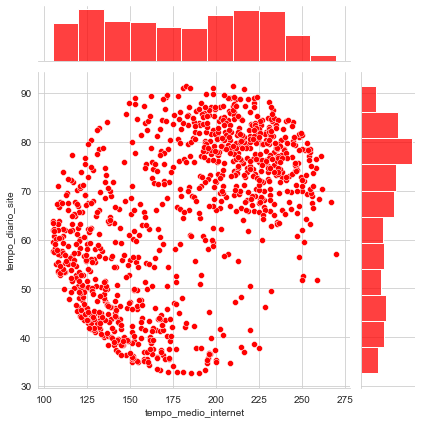

In [49]:
#quem passa mais tempo na internet passa mais tempo no site?
sns.jointplot( x = 'tempo_medio_internet', y = 'tempo_diario_site',  data= df, color="red");

- de fato podemos observar que normalmente quem passa mais tempo na internet passa mais tempo no site

**agora iremos analiser nossa classe**

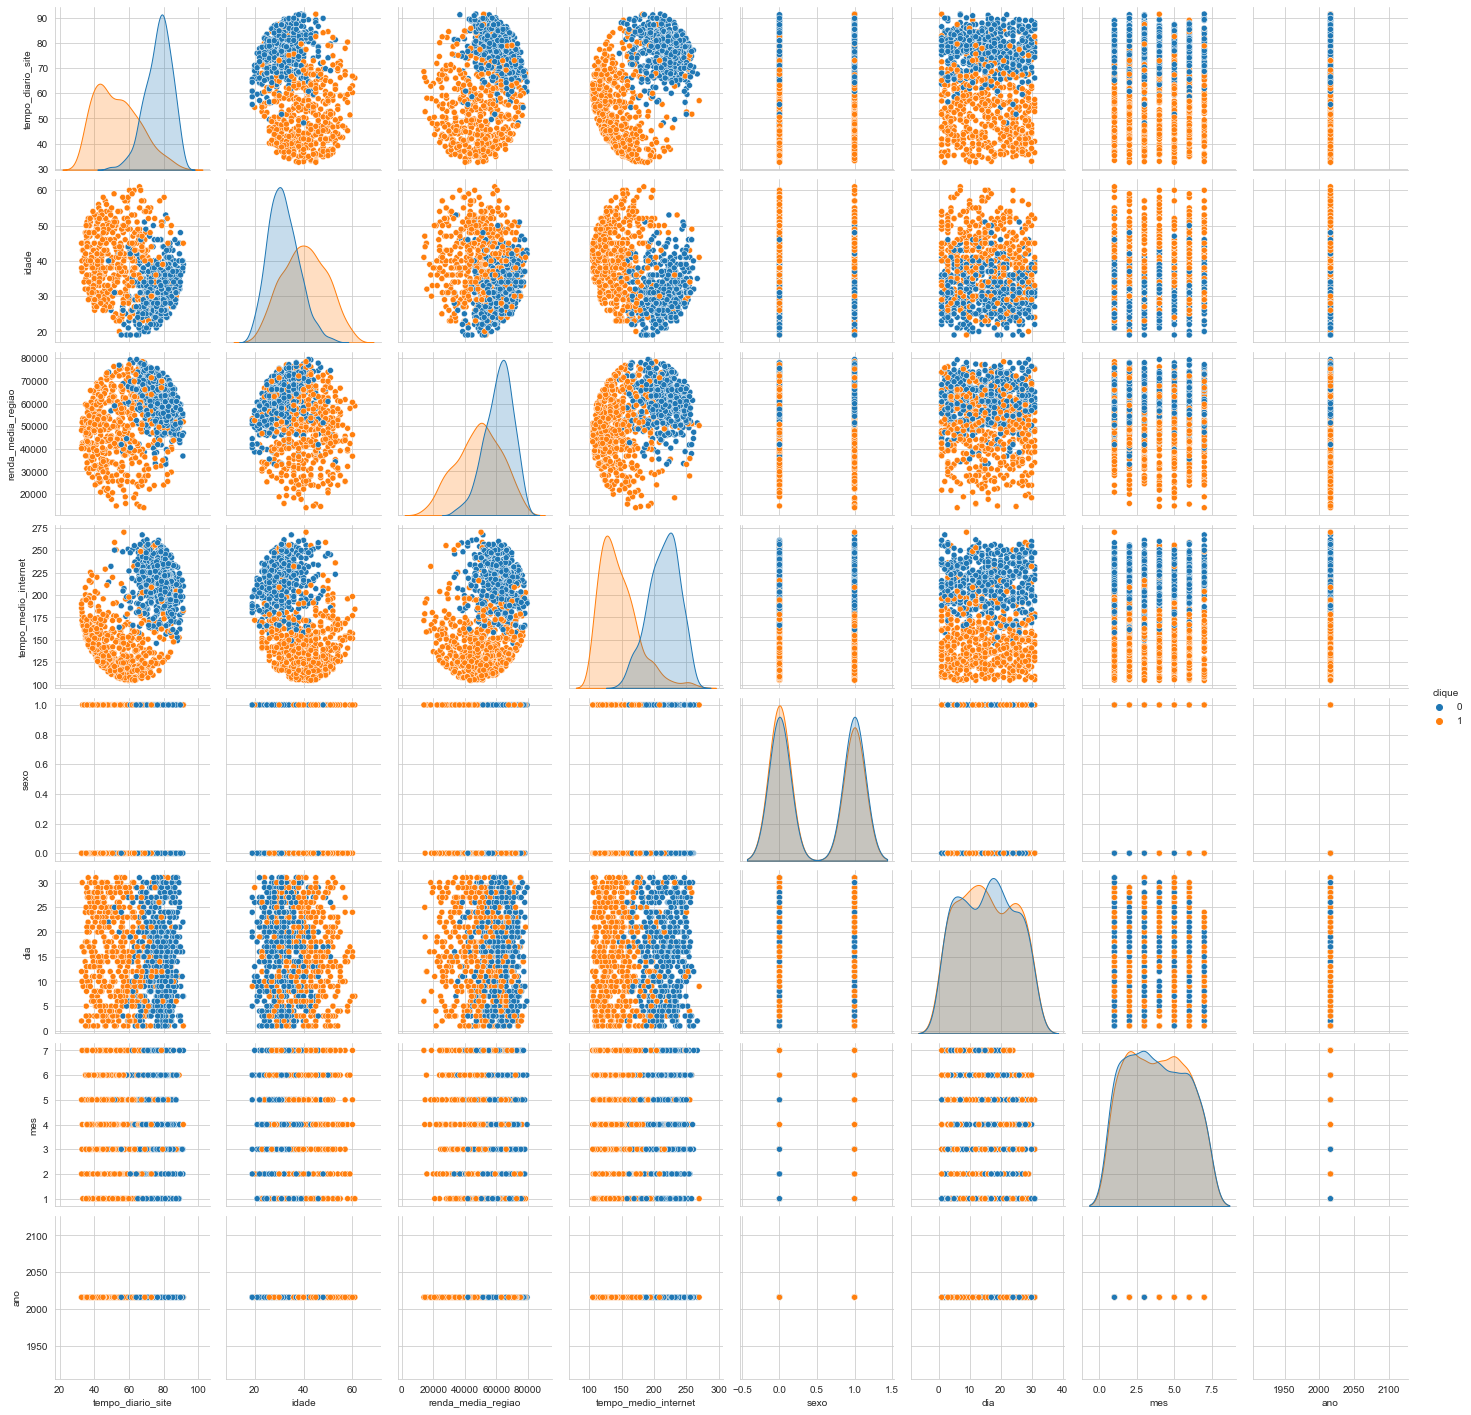

In [51]:
sns.pairplot(df,hue='clique');

- os dados se separam de alguma forma com as variaveis

# hora de treinar o modelo



In [52]:
#dividir o modelo entre treino e teste
from sklearn.model_selection import train_test_split

In [54]:
#melhores parametros encontrados
x = df[['tempo_diario_site', 'idade', 'tempo_medio_internet']]
y = df['clique']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [58]:
#importando o algoritmo para treinar o modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [59]:
clf = LogisticRegression()

In [61]:
#treinando o modelo
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [62]:
#testando a acuaracia do modelo
accuracy_score(y_test, pred )

0.95

In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       103
           1       0.99      0.91      0.95        97

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



### conclusões

- o modelo atingiu bons resultados considerando a acuracia
- com os testes foi mostrado que as features mais importantes pro modelo foram: tempo diario no site, idade e o tempo medio de internet